# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

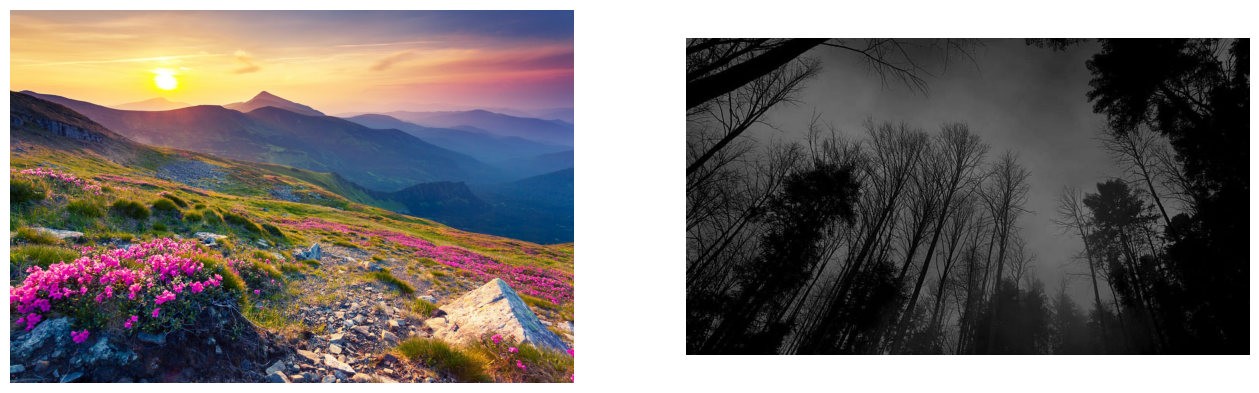

In [3]:
img = cv2.imread('mountains.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dark_img = cv2.cvtColor(cv2.imread('trees.jpg'), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(img)
plt.axis(False)
plt.subplot(122), plt.imshow(dark_img)
plt.axis(False);

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

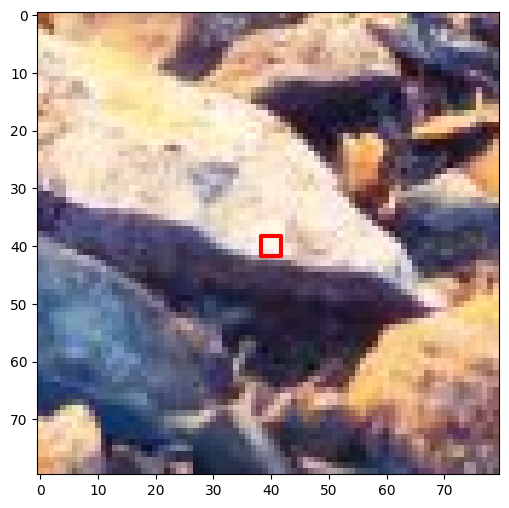

In [4]:
white_x = 1312
white_y = 1229

plt.imshow(img[white_x-40:white_x+40, white_y-40:white_y+40])
plt.scatter(40, 40, marker='s', c='none', edgecolors='red', s=200, linewidths=3)

Coefficients: 1.0 1.0323886639676114 1.058091286307054
Random pixel: [194 163 143] [194 168 151]
Supposedly white pixel: [255 247 241] [255 255 255]


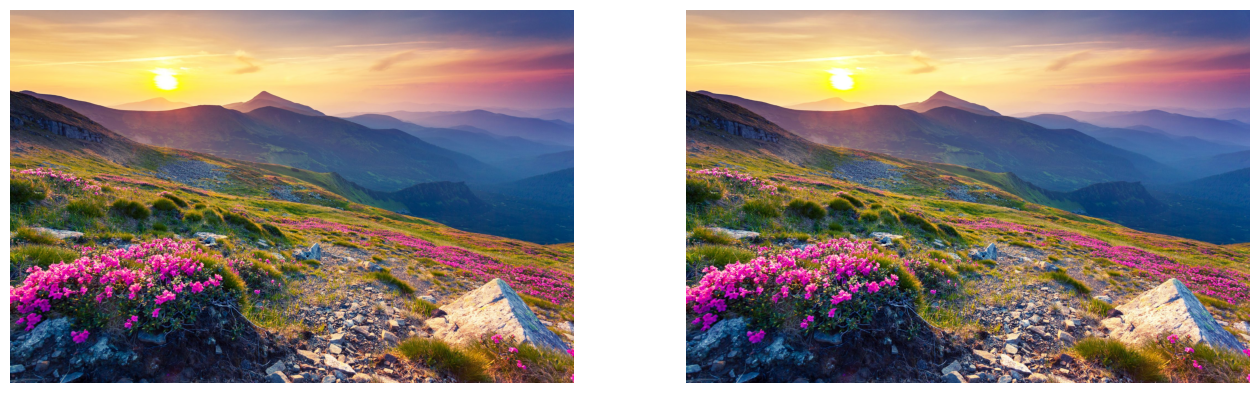

In [5]:
# Define white patch and the coefficients
row, col = white_x, white_y 
white = img[row, col, :]
coeffs = 255.0 / white
print('Coefficients:', *coeffs)

# # Apply white balancing and generate balanced image
# balanced = np.zeros_like(img, dtype=np.float32)
# for channel in range(3):
#     balanced[..., channel] = img[..., channel] * coeffs[channel]
img_white_bal = img * coeffs

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
# balanced = balanced/255
# balanced[balanced > 1] = 1

# Scale [0..255]
img_white_bal = img_white_bal.clip(max=255).astype(np.uint8)

print('Random pixel:', img[0, 0], img_white_bal[0, 0])
print('Supposedly white pixel:', img[white_x, white_y], img_white_bal[white_x, white_y])

plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(img)
plt.axis(False)
plt.subplot(122), plt.imshow(img_white_bal)
plt.axis(False);

### Gray world
This algorithm assumes that a scene, on average, is gray.

Means: [125.90753515913072, 109.56539763954186, 102.89966036366151]
Global average: 112.79086438744469
Coefficients: 0.8958229882341174 1.0294387353798893 1.0961247489916517
Means after balancing: [112.27886404752029, 112.27067777470502, 112.2569767324622]


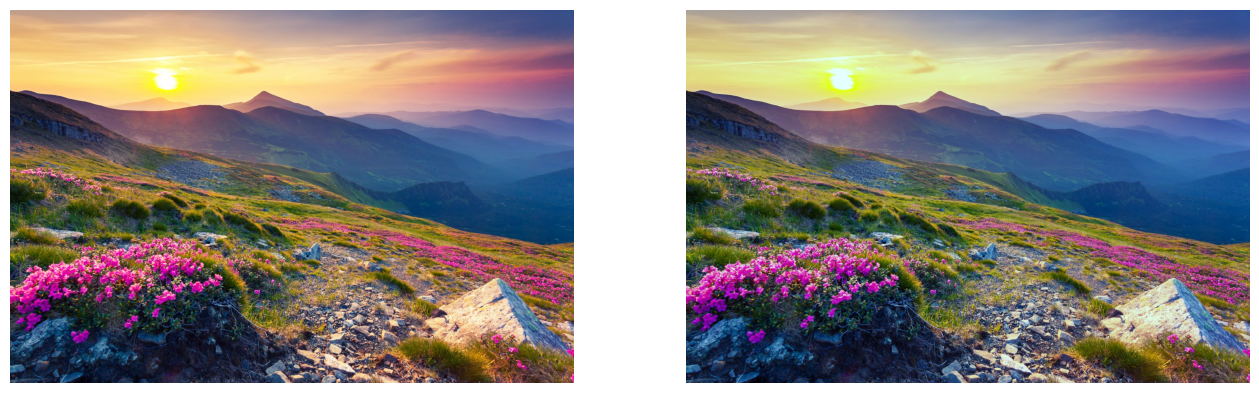

In [6]:
# Load your image
# img = cv2.imread('...')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
# mean_r = 
# mean_g = 
# mean_b = 
channel_means = [np.mean(img[..., i]) for i in range(3)]
avg_val = np.mean(channel_means)
print('Means:', channel_means)
print('Global average:', avg_val)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

# I decided to chose global average as a value on wich to center all the channels
# Any other value could be used instead of avg_val
kr, kg, kb = avg_val / channel_means
print('Coefficients:', kr, kg, kb)


# Apply color balancing and generate the balanced image
# Scale [0..255]
img_gray_bal = (img * (kr, kg, kb)).clip(max=255).astype(np.uint8)

# Check the means after balancing
bal_channel_means = [np.mean(img_gray_bal[..., i]) for i in range(3)]
bal_avg_val = np.mean(bal_channel_means)
print('Means after balancing:', bal_channel_means)
# Show the original and the balanced image side by side

plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(img)
plt.axis(False)
plt.subplot(122), plt.imshow(img_gray_bal)
plt.axis(False);

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

Maximums: [139, 139, 139]
Coefficients: 1.8345323741007193 1.8345323741007193 1.8345323741007193


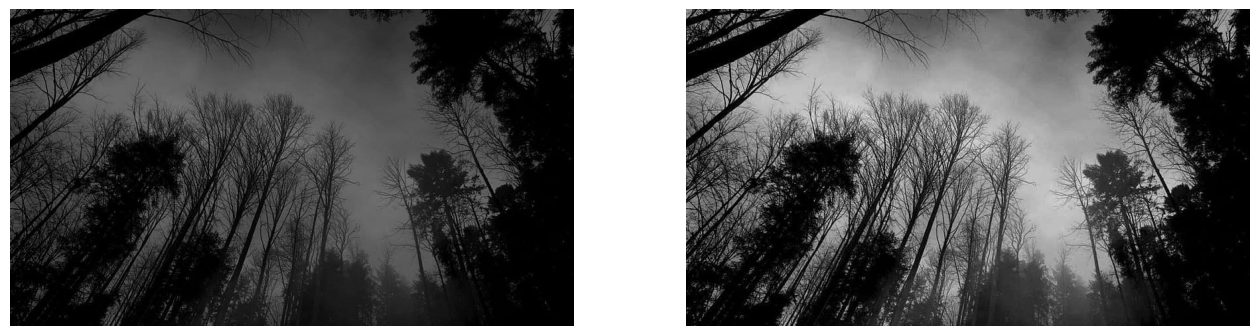

In [9]:
# Load your image
# img = cv2.imread('...')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
# max_r = 
# max_g = 
# max_b = 
maxs = [np.max(dark_img[..., i]) for i in range(3)]
print('Maximums:', maxs)

# Apply scale-by-max balancing and generate the balanced image
kr, kg, kb = 255 / np.array(maxs)
print('Coefficients:', kr, kg, kb)

# Scale [0..1]
img_max_bal = (dark_img * (kr, kg, kb) / 255).clip(max=1)

plt.figure(figsize=(16, 12))
plt.subplot(121), plt.imshow(dark_img)
plt.axis(False)
plt.subplot(122), plt.imshow(img_max_bal)
plt.axis(False);